In [0]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [0]:
ds = web.DataReader('AAPL', data_source='yahoo', start='2008-01-01', end='2020-03-06')

ds

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,28.608572,27.507143,28.467142,27.834286,269794700.0,24.161295
2008-01-03,28.198572,27.527143,27.915714,27.847143,210516600.0,24.172449
2008-01-04,27.571428,25.555714,27.350000,25.721428,363958000.0,22.327251
2008-01-07,26.228571,24.318571,25.892857,25.377142,518048300.0,22.028393
2008-01-08,26.065714,24.400000,25.734285,24.464285,380954000.0,21.235991
...,...,...,...,...,...,...
2020-03-02,301.440002,277.720001,282.279999,298.809998,85349300.0,298.809998
2020-03-03,304.000000,285.799988,303.670013,289.320007,79868900.0,289.320007
2020-03-04,303.399994,293.130005,296.440002,302.739990,54794600.0,302.739990


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


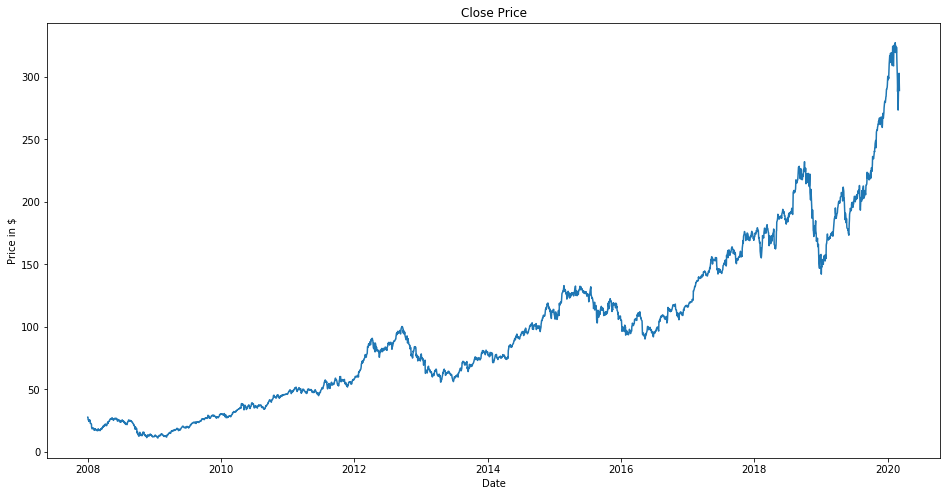

In [0]:
plt.figure(figsize=(16,8))
plt.title("Close Price")
plt.plot(ds["Close"])
plt.xlabel('Date')
plt.ylabel("Price in $")
plt.show()

In [0]:
data = ds.filter(['Close'])

dataset = data.values

training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2453

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05272579],
       [0.05276648],
       [0.04604014],
       ...,
       [0.92260187],
       [0.8915288 ],
       [0.87921974]])

In [0]:
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.05272579, 0.05276648, 0.04604014, 0.04495072, 0.0420622 ,
       0.04574631, 0.0451225 , 0.04271313, 0.04546605, 0.04106319,
       0.03681403, 0.03737908, 0.03759153, 0.03500587, 0.0275156 ,
       0.02594702, 0.02342012, 0.02342012, 0.02411175, 0.02440105,
       0.02583853, 0.02511075, 0.02416147, 0.0231263 , 0.01979929,
       0.01945574, 0.02137239, 0.02316698, 0.02109212, 0.02314438,
       0.02226742, 0.02098815, 0.01988066, 0.02062201, 0.01959136,
       0.01865111, 0.01877769, 0.01851099, 0.02023325, 0.02337492,
       0.02116445, 0.01967724, 0.02098363, 0.02092487, 0.01931561,
       0.0199123 , 0.01875509, 0.0222177 , 0.02162101, 0.02248441,
       0.02188319, 0.02193744, 0.02469035, 0.02326643, 0.02489377,
       0.02772353, 0.02837899, 0.0302233 , 0.028049  , 0.02929663])]
[0.029518125276774408]

[array([0.05272579, 0.05276648, 0.04604014, 0.04495072, 0.0420622 ,
       0.04574631, 0.0451225 , 0.04271313, 0.04546605, 0.04106319,
       0.03681403, 0.03737908, 0.0

In [0]:
# convert to numy array to train lstm model 
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
# reshape the data as lstm model expects 3d input and rn its 2d (no of features = 1 'closing price')
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2393, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
# optimizers are used to improve upon the loss func 
# loss func is used to measure how well the model did on training
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [0]:
# fit another name for train
# batch size is the total no of training examples present in a single batch
# epochs is the number of iterations when an entire dataset is passed 
model.fit(x_train, y_train, batch_size= 1, epochs= 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





2393/2393 [==============================] - 180s 75ms/step - loss: 2.7174e-04


In [0]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
x_test = np.array(x_test)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
predictions = model.predict(x_test)
pridictions = scaler.inverse_transform(predictions)

In [0]:
# root mean squared error = measure of how accurate the model predicts the response 
# rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

207.09476425229437

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


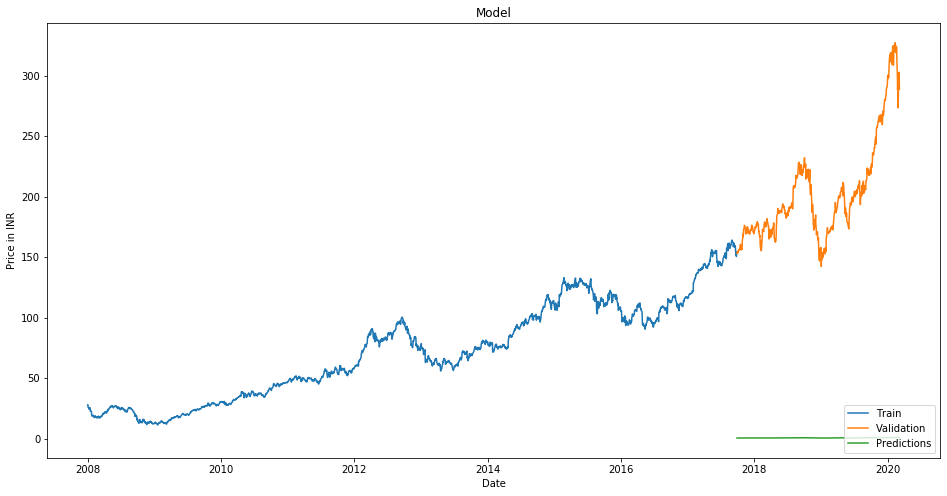

In [0]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel("Date")
plt.ylabel("Price in INR")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc= 'lower right')
plt.show()

In [0]:
valid

,Close,Predictions
Date,,
2017-09-28,153.279999,0.431783
2017-09-29,154.119995,0.430879
2017-10-02,153.809998,0.430676
2017-10-03,154.479996,0.430699
2017-10-04,153.479996,0.431101
...,...,...
2020-03-02,298.809998,0.852750
2020-03-03,289.320007,0.846847
2020-03-04,302.739990,0.843530
